Below the code to simulate the evolution in time of the Kuramoto-Sivashinky equation

Kuramoto-Sivashinsky equation
$u_t = -uu_x-u_{xx}-u_{xxxx}$




In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

In [ ]:
N=1024
# Initial condition
x = 32*np.pi*np.transpose(np.arange(1, N+1))/N
# u is the initial condition -- modify u if you want to change initial conditions
u = np.cos(x/16)*(1+np.sin(x/16))
v = np.fft.fft(u)

In [ ]:
# Numerical grid
h = 0.025
k = np.transpose(np.conj(np.concatenate((np.arange(0, N/2), np.array([0]), np.arange(-N/2+1, 0))))) / 16
L = np.power(k,2) - np.power(k,4)
E = np.exp(h*L)
E2 = np.exp(h*L/2)
M= 16
r = np.exp(1j*np.pi*(np.arange(1, M+1)-0.5) / M)
LR = h*np.transpose(np.repeat([L], M, axis=0)) + np.repeat([r], N, axis=0)
Q= h*np.real(np.mean((np.exp(LR/2)-1)/LR, axis=1))
f1 = h*np.real(np.mean((-4-LR+np.exp(LR)*(4-3*LR+LR**2))/LR**3, axis=1))
f2 = h*np.real(np.mean((2+LR+np.exp(LR)*(-2+LR))/LR**3, axis=1))
f3 = h*np.real(np.mean((-4-3*LR-LR**2+np.exp(LR)*(4-LR))/LR**3, axis=1))

In [ ]:
# Initialization of the time stepping loop
uu=np.array([u])
tt=0
tmax = 100
nmax = round(tmax/h)
nplot = int((tmax/250)/h)
g = -0.5*k

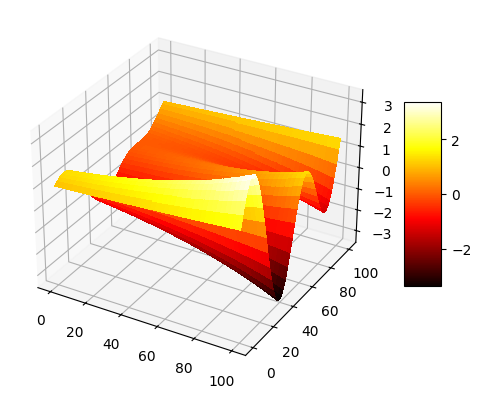

In [ ]:
#Loop for the evolution in time
for n in range(1,nmax+1):
  t = n*h
  Nv = g*np.fft.fft(np.real(np.power(np.fft.ifft(v),2)))
  a = E2*v+Q*Nv
  Na = g*np.fft.fft(np.real(np.power(np.fft.ifft(a),2)))
  b = E2*v +Q*Na
  Nb = g*np.fft.fft(np.real(np.power(np.fft.ifft(b),2)))
  c = E2*a+Q*(2*Nb-Nv)
  Nc = g*np.fft.fft(np.real(np.power(np.fft.ifft(c),2)))
  v = E*v + Nv*f1+2*(Na+Nb)*f2+Nc*f3
  if n%nplot == 0:
        u = np.real(np.fft.ifft(v))
        uu = np.append(uu, np.array([u]), axis=0)
        tt = np.hstack((tt, t))

# plot
fig = plt.figure()
# Instead of using fig.gca(projection='3d'), use fig.add_subplot() with the projection argument.
ax = fig.add_subplot(projection='3d')
tt, x = np.meshgrid(tt, x)
surf = ax.plot_surface(tt, x, uu.transpose(), cmap=cm.hot, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [ ]:
import numpy as np
import os  # Import the os module
from IPython.display import FileLink

# Ensure uu and tt are defined and contain data
if 'uu' in locals() and uu.size > 0 and 'tt' in locals() and tt.size > 0:
    # Save the files
    np.save('uu.npy', uu)
    np.save('tt.npy', tt)

    # Verify the files were saved
    if os.path.exists('uu.npy') and os.path.exists('tt.npy'):
        print("Files saved successfully.")
        FileLink('uu.npy')  # Create a download link for uu.npy
        FileLink('tt.npy')  # Create a download link for tt.npy
    else:
        print("Error: Files were not saved.")
else:
    print("Error: uu or tt is not defined or empty.")

Files saved successfully.


In [ ]:
import numpy as np
from IPython.display import FileLink

# Save the file
np.save('uu.npy', uu)

# Create a download link
FileLink('uu.npy')

/content/uu.npy

In [ ]:
import numpy as np
from IPython.display import FileLink

# Save the file
np.save('tt.npy', tt)

# Create a download link
FileLink('tt.npy')

/content/tt.npy

In [ ]:
# Step 1: Import Libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error

In [ ]:
# Step 2: Load the Saved Data
uu = np.load('uu.npy')  # State of the system over time
tt = np.load('tt.npy')  # Time steps

In [ ]:
# Step 3: Prepare Input-Output Pairs for Training
X_train = uu[:-1, :]  # Input: all time steps except the last
y_train = uu[1:, :]   # Output: all time steps except the first

In [ ]:
# Step 4: Build and Train the Neural Network
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(128, activation='relu'),  # Hidden layer
    Dense(y_train.shape[1])  # Output layer
])

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 1.1766 - val_loss: 1.7409
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.5607 - val_loss: 0.5649
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1343 - val_loss: 0.2752
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0568 - val_loss: 0.1960
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0334 - val_loss: 0.1680
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0232 - val_loss: 0.1479
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0186 - val_loss: 0.1270
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0169 - val_loss: 0.1087
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0130 - val_loss: 0.0901
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0099 - val_loss: 0.0542
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0059 - val_loss: 0.0335
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0036 - val_loss: 0.0203
Epoch 13/50


In [ ]:
# Step 5: Predict Using the Trained Model
y_pred = model.predict(X_train)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


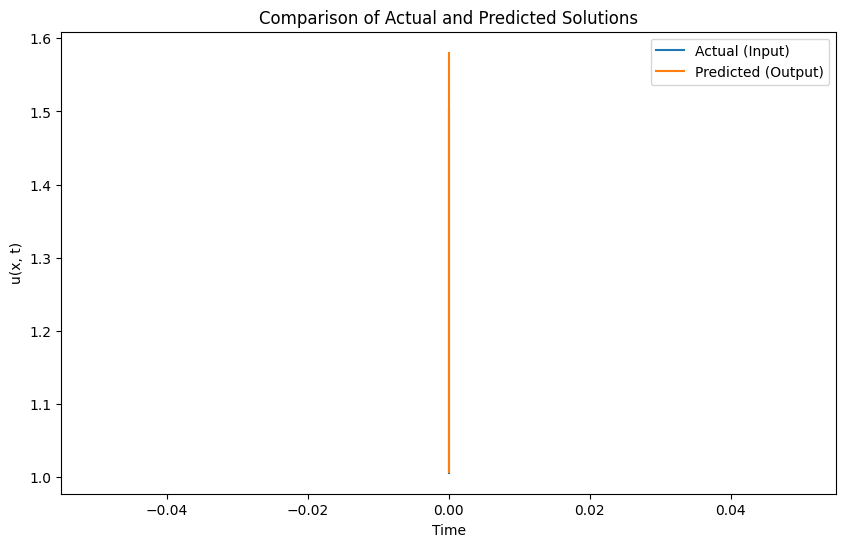

In [ ]:
# Step 6: Compare Predictions with Actual Solutions
plt.figure(figsize=(10, 6))
# tt is a meshgrid, taking a slice of its first column should make it compatible with X_train[:, 0]
# We need to ensure that tt and X_train (and y_pred) have the same number of rows
# Since X_train has 500 rows (time steps), we'll take the first 500 time steps from tt
plt.plot(tt[:X_train.shape[0], 0], X_train[:, 0], label='Actual (Input)')
plt.plot(tt[:y_pred.shape[0], 0], y_pred[:, 0], label='Predicted (Output)')
plt.xlabel('Time')
plt.ylabel('u(x, t)')
plt.legend()
plt.title('Comparison of Actual and Predicted Solutions')
plt.show()

In [ ]:
print(f"tt shape: {tt.shape}")
print(f"uu shape: {uu.shape}")
print(f"X_train shape: {X_train.shape}")
print(f"X_train.transpose() shape: {X_train.transpose().shape}")

tt shape: (1024, 251)
uu shape: (251, 1024)
X_train shape: (250, 1024)
X_train.transpose() shape: (1024, 250)


In [ ]:
tt_mesh, x_mesh = np.meshgrid(tt, np.arange(uu.shape[1]), indexing='ij')

In [ ]:
print(f"tt_mesh shape: {tt_mesh.shape}")
print(f"x_mesh shape: {x_mesh.shape}")

tt_mesh shape: (257024, 1024)
x_mesh shape: (257024, 1024)


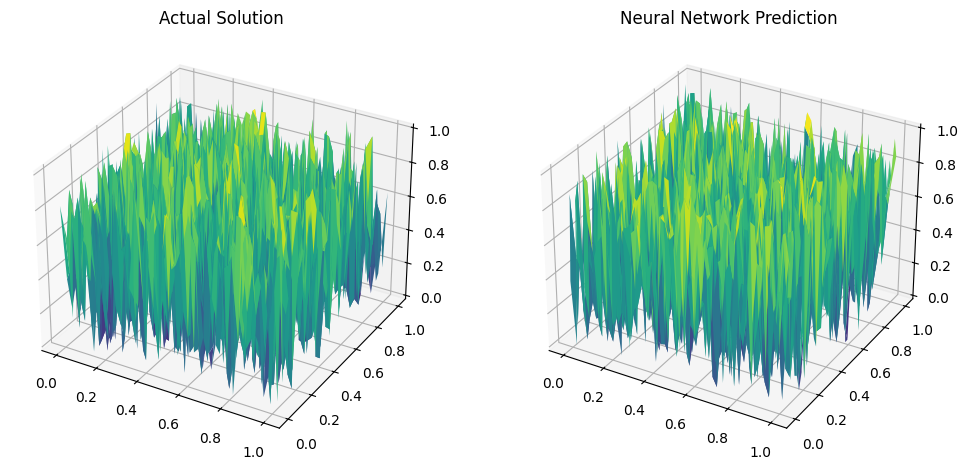

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example meshgrid (ensure dimensions match your data)
tt_mesh, x_mesh = np.meshgrid(np.linspace(0, 1, 50), np.linspace(0, 1, 50))

# Ensure X_train is reshaped properly to match the grid
X_train = np.random.rand(50, 50)  # Replace with your actual data
y_pred = np.random.rand(50, 50)   # Replace with your actual prediction data

# Create the figure
fig = plt.figure(figsize=(12, 6))

# Plot actual solution
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(tt_mesh, x_mesh, X_train, cmap='viridis')
ax.set_title('Actual Solution')

# Plot neural network prediction
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(tt_mesh, x_mesh, y_pred, cmap='viridis')
ax.set_title('Neural Network Prediction')

plt.show()


In [ ]:
# Step 8: Predict Using the Trained Model
# Reload the original X_train data
X_train = uu[:-1, :]
y_pred = model.predict(X_train)

# Reshape y_pred if necessary to match y_train
y_pred = y_pred.reshape(y_train.shape) # Added this line to reshape y_pred

# Step 9: Evaluate the Model
mse = mean_squared_error(y_train, y_pred)
print(f"Mean Squared Error: {mse}")

# Step 10: Save the Trained Model
model.save('ks_model.keras')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Mean Squared Error: 0.0009284770396187673
